In [1]:
import pandas as pd
import numpy as np

In [2]:
dna_df = pd.read_csv("cleaned_codon_usage.csv")
dna_df

,Unnamed: 0,Kingdom,DNAtype,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,0,4,0,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,1,4,0,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,2,4,0,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,3,4,0,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,4,4,0,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12957,12957,2,0,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
12958,12958,2,1,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
12959,12959,2,1,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
12960,12960,2,0,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


## PCA

In [3]:
from sklearn.preprocessing import MinMaxScaler
y_DNAtype = dna_df['DNAtype']
y_Kingdom = dna_df['Kingdom']

x = dna_df.drop(columns=['Unnamed: 0','DNAtype','Kingdom'])
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[0.07611597, 0.13120297, 0.00330404, ..., 0.05553097, 0.01952362,
        0.        ],
       [0.12489646, 0.14799869, 0.00449349, ..., 0.05995575, 0.02655213,
        0.        ],
       [0.09084215, 0.23775766, 0.08967158, ..., 0.08650442, 0.        ,
        0.01349578],
       ...,
       [0.0654855 , 0.36219871, 0.10976013, ..., 0.07876106, 0.04646622,
        0.18903468],
       [0.08085596, 0.22118006, 0.05068394, ..., 0.02190265, 0.03084733,
        0.01462043],
       [0.08182237, 0.40615116, 0.11445186, ..., 0.03451327, 0.04451386,
        0.20253046]])

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)  
x_scaled = pca.fit_transform(x_scaled) 
pca.explained_variance_ratio_

array([0.35063693, 0.20579774, 0.05714541, 0.03743534, 0.03364339,
       0.03175275, 0.02082747, 0.0194224 , 0.01539092, 0.01362742])

Text(0.5, 1.0, 'Principal component V.S. Percentage of variance explained')

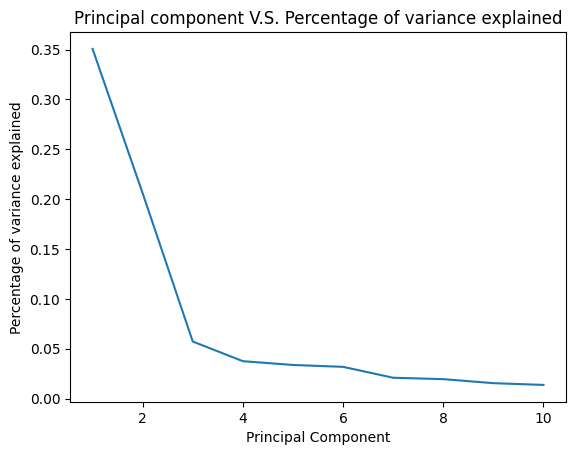

In [5]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.plot(range(1,11),pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of variance explained')
plt.title('Principal component V.S. Percentage of variance explained')

## Data Splitting

In [6]:
x_DNAtype_train, x_DNAtype_test, y_DNAtype_train, y_DNAtype_test = train_test_split(x_scaled, y_DNAtype, test_size=0.20)
x_Kingdom_train, x_Kingdom_test, y_Kingdom_train, y_Kingdom_test = train_test_split(x_scaled, y_Kingdom, test_size=0.20)
print(x_DNAtype_train.shape, x_DNAtype_test.shape, y_DNAtype_train.shape, y_DNAtype_test.shape)

(10369, 10) (2593, 10) (10369,) (2593,)


## KNN model:

### DNAtype Label:

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params:  {'leaf_size': 1, 'n_neighbors': 5, 'weights': 'distance'}
Best scores:  0.9914167598191563

accuracy_score:  0.9892016968762052
precision_score:  0.9892016968762052
recall_score:  0.9892016968762052
f1_score:  0.9892016968762052
auc: 0.9952540983941005

Confusion matrix :
 [[1843    1   12]
 [   4  566    5]
 [   4    2  156]]

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1856
           1       0.99      0.98      0.99       575
           2       0.90      0.96      0.93       162

    accuracy                           0.99      2593
   macro avg       0.96      0.98      0.97      2593
weighted avg       0.99      0.99      0.99      2593



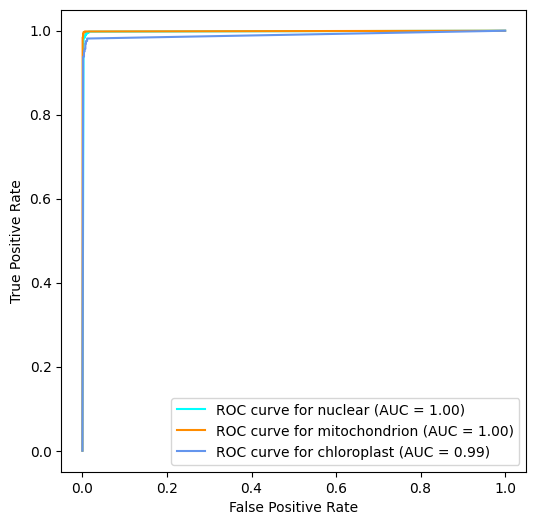

In [7]:
from utils.knn import knn
default_params = {'algorithm':'auto',
                  'p':2,
                  'metric':'minkowski'}
cv_params = {'weights':['uniform','distance'],
             'n_neighbors':np.linspace(1, 10, 10, dtype=int),
             'leaf_size':np.linspace(1, 10, 10, dtype=int)}

knn_model_DNAtype = knn(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, default_params, cv_params)
knn_model_DNAtype.generate()

### Kingdom Label:

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Best params:  {'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}
Best scores:  0.9246793856447942

accuracy_score:  0.9271114539143849
precision_score:  0.9271114539143849
recall_score:  0.9271114539143849
f1_score:  0.927111453914385
auc: 0.9612240017967084

Confusion matrix :
 [[  15    5    2    1    1]
 [   5  520   19    9    9]
 [   1   20 1307    2   49]
 [   0    5    3   35    1]
 [   0    7   50    0  527]]

Classification report :
               precision    recall  f1-score   support

           0       0.71      0.62      0.67        24
           1       0.93      0.93      0.93       562
           2       0.95      0.95      0.95      1379
           3       0.74      0.80      0.77        44
           4       0.90      0.90      0.90       584

    accuracy                           0.93      2593
   macro avg       0.85      0.84      0.84      2593
weighted avg       0.93      0.93      0.93     

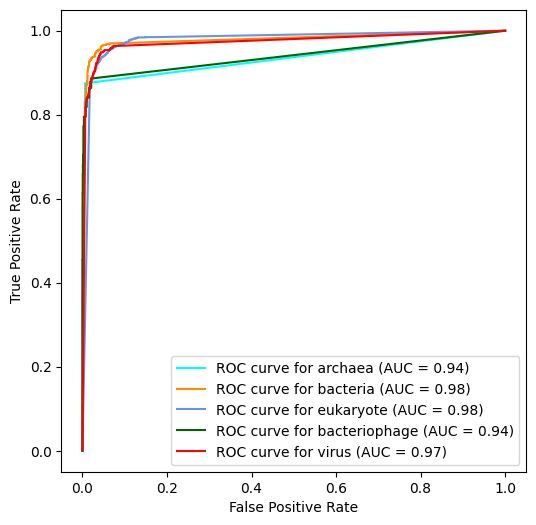

In [8]:
knn_model_Kingdom = knn(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, default_params, cv_params)
knn_model_Kingdom.generate()

## Random Forest:

#### DNAtype Label:

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params:  {'max_features': 47}
Best scores:  0.986691218918352

accuracy_score:  0.9845738526802931
precision_score:  0.9845738526802931
recall_score:  0.9845738526802931
f1_score:  0.9845738526802931
auc: 0.997120646499066

Confusion matrix :
 [[1846    3    7]
 [  14  561    0]
 [  14    2  146]]

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1856
           1       0.99      0.98      0.98       575
           2       0.95      0.90      0.93       162

    accuracy                           0.98      2593
   macro avg       0.98      0.96      0.97      2593
weighted avg       0.98      0.98      0.98      2593



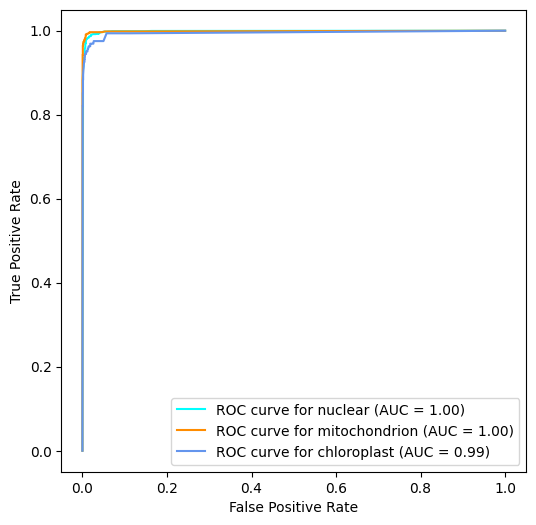

In [9]:
from utils.random_forest import random_forest
default_params = {}
cv_params = { 
    "max_features": np.linspace(20, 64, 40, dtype=int)
}

random_forest_DNAtype = random_forest(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, default_params, cv_params)
random_forest_DNAtype.generate()

### Kingdom Label:

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params:  {'max_features': 36}
Best scores:  0.9052943641929737

accuracy_score:  0.9136135750096414
precision_score:  0.9136135750096414
recall_score:  0.9136135750096414
f1_score:  0.9136135750096414
auc: 0.9833937067982198

Confusion matrix :
 [[  12    7    3    0    2]
 [   6  512   34    3    7]
 [   0   25 1309    0   45]
 [   0   17    6   20    1]
 [   0   13   55    0  516]]

Classification report :
               precision    recall  f1-score   support

           0       0.67      0.50      0.57        24
           1       0.89      0.91      0.90       562
           2       0.93      0.95      0.94      1379
           3       0.87      0.45      0.60        44
           4       0.90      0.88      0.89       584

    accuracy                           0.91      2593
   macro avg       0.85      0.74      0.78      2593
weighted avg       0.91      0.91      0.91      2593



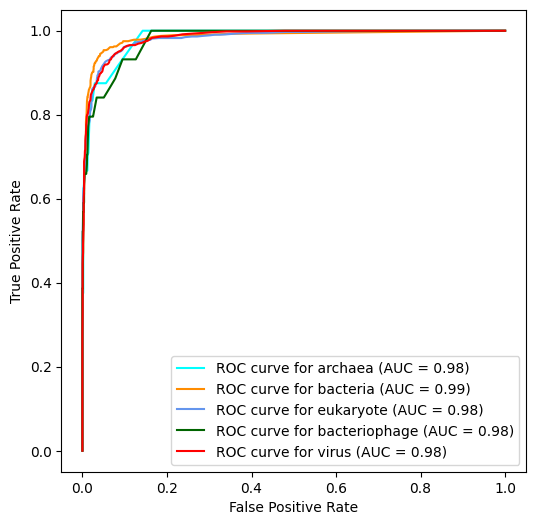

In [10]:
random_forest_model_Kingdom = random_forest(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, default_params, cv_params)
random_forest_model_Kingdom.generate()

## XGBoost:

### DNAtype:

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params:  {'max_depth': 10}
Best scores:  0.985148353189583

accuracy_score:  0.9838025453143078
precision_score:  0.9838025453143078
recall_score:  0.9838025453143078
f1_score:  0.9838025453143078
auc: 0.9956664218889597

Confusion matrix :
 [[1850    1    5]
 [  16  557    2]
 [  15    3  144]]

Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1856
           1       0.99      0.97      0.98       575
           2       0.95      0.89      0.92       162

    accuracy                           0.98      2593
   macro avg       0.98      0.95      0.96      2593
weighted avg       0.98      0.98      0.98      2593



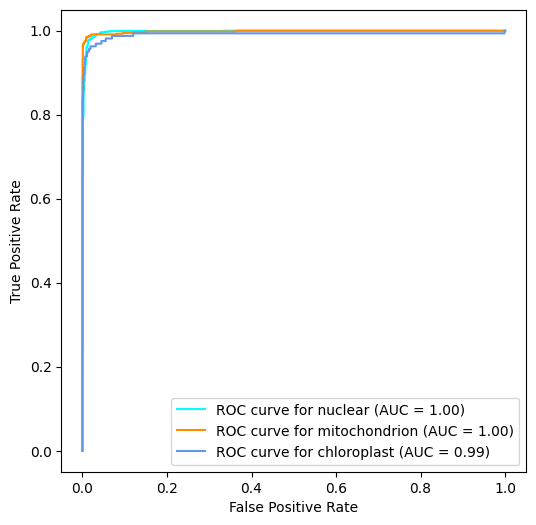

In [11]:
from utils.xgboost import xgboost
default_params = {'learning_rate': 0.01, 'subsample':0.7}
cv_params = { 
    'max_depth':np.linspace(1, 10, 10, dtype=int)
}

xgboost_DNAtype = xgboost(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, default_params, cv_params)
xgboost_DNAtype.generate()

### Kingdom Label:

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params:  {'max_depth': 10}
Best scores:  0.8961327179919438

accuracy_score:  0.9051291939838025
precision_score:  0.9051291939838025
recall_score:  0.9051291939838025
f1_score:  0.9051291939838024
auc: 0.9710586458092813

Confusion matrix :
 [[  12    6    4    0    2]
 [   2  523   27    1    9]
 [   0   25 1293    0   61]
 [   0   20    5   19    0]
 [   0   19   65    0  500]]

Classification report :
               precision    recall  f1-score   support

           0       0.86      0.50      0.63        24
           1       0.88      0.93      0.91       562
           2       0.93      0.94      0.93      1379
           3       0.95      0.43      0.59        44
           4       0.87      0.86      0.87       584

    accuracy                           0.91      2593
   macro avg       0.90      0.73      0.79      2593
weighted avg       0.91      0.91      0.90      2593



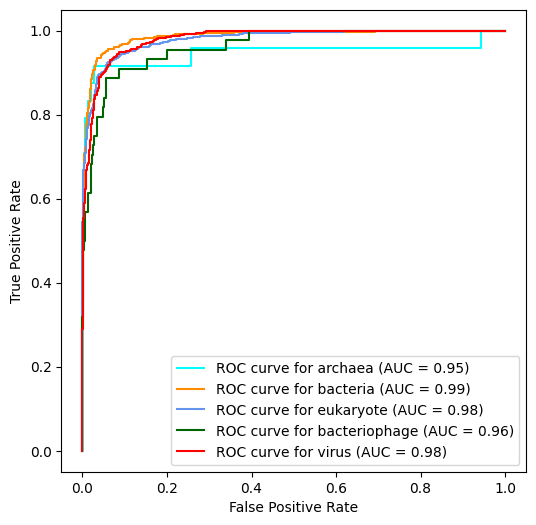

In [12]:
xgboost_Kingdom = xgboost(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, default_params, cv_params)
xgboost_Kingdom.generate()

## Linear Regression:

### DNAtype Label:

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best params:  {'C': 1000.0, 'solver': 'newton-cg'}
Best scores:  0.9860158691836679

accuracy_score:  0.9838025453143078
precision_score:  0.9838025453143078
recall_score:  0.9838025453143078
f1_score:  0.9838025453143078
auc: 0.997922780295256

Confusion matrix :
 [[1841    4   11]
 [  11  561    3]
 [  10    3  149]]

Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1856
           1       0.99      0.98      0.98       575
           2       0.91      0.92      0.92       162

    accuracy                           0.98      2593
   macro avg       0.96      0.96      0.96      2593
weighted avg       0.98      0.98      0.98      2593



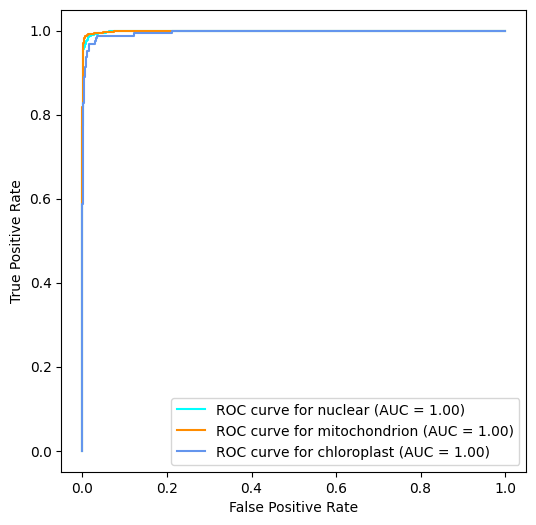

In [13]:
from utils.linear_regression import linear_regression
default_params = {}
cv_params = { 
    "C":np.logspace(-3,3,7),
    "solver": ['newton-cg', 'sag', 'saga']
}

linear_regression_DNAtype = linear_regression(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, default_params, cv_params)
linear_regression_DNAtype.generate()

### Kingdom Label:

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Best params:  {'C': 1000.0, 'solver': 'newton-cg'}
Best scores:  0.8121326640309512

accuracy_score:  0.8175858079444659
precision_score:  0.8175858079444659
recall_score:  0.8175858079444659
f1_score:  0.8175858079444659
auc: 0.94977849718756

Confusion matrix :
 [[   9    5    5    0    5]
 [   3  494   45    1   19]
 [   1   59 1201    1  117]
 [   0   18   18    6    2]
 [   0   14  160    0  410]]

Classification report :
               precision    recall  f1-score   support

           0       0.69      0.38      0.49        24
           1       0.84      0.88      0.86       562
           2       0.84      0.87      0.86      1379
           3       0.75      0.14      0.23        44
           4       0.74      0.70      0.72       584

    accuracy                           0.82      2593
   macro avg       0.77      0.59      0.63      2593
weighted avg       0.81      0.82      0.81      2593



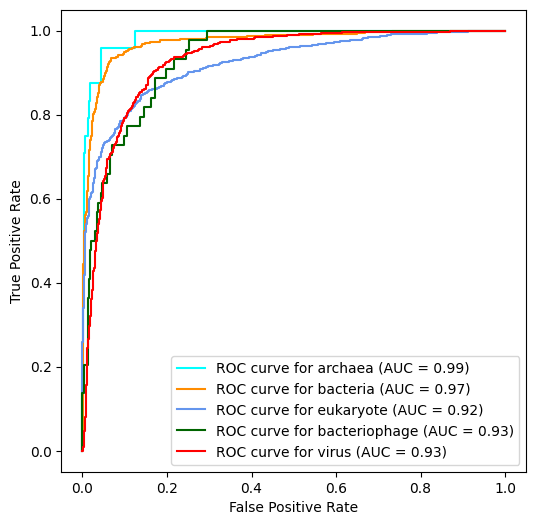

In [14]:
linear_regression = linear_regression(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, default_params, cv_params)
linear_regression.generate()

## Naive Bayes:

### DNAtype Label:

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params:  {'var_smoothing': 1e-09}
Best scores:  0.9588194358192139

accuracy_score:  0.956421133821828
precision_score:  0.956421133821828
recall_score:  0.956421133821828
f1_score:  0.956421133821828
auc: 0.9890692615720716

Confusion matrix :
 [[1798   25   33]
 [  28  545    2]
 [  21    4  137]]

Classification report :
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1856
           1       0.95      0.95      0.95       575
           2       0.80      0.85      0.82       162

    accuracy                           0.96      2593
   macro avg       0.91      0.92      0.91      2593
weighted avg       0.96      0.96      0.96      2593



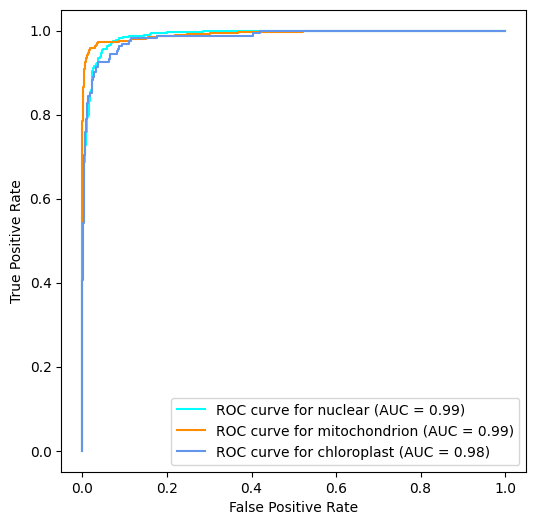

In [15]:
from utils.naive_bayes import naive_bayes
default_params = {}
cv_params = { 
    'var_smoothing': [1e-9, 1e-6, 1e-12],
}

naive_bayes_DNAtype = naive_bayes(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, default_params, cv_params)
naive_bayes_DNAtype.generate('gaussian')

### Kingdom Label:

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best params:  {'var_smoothing': 1e-09}
Best scores:  0.7409589984839752

accuracy_score:  0.7551099112996529
precision_score:  0.7551099112996529
recall_score:  0.7551099112996529
f1_score:  0.7551099112996528
auc: 0.9412541621590578

Confusion matrix :
 [[ 14   6   1   0   3]
 [  7 494  25  14  22]
 [  9  96 931   0 343]
 [  0  17   5  18   4]
 [  1  23  57   2 501]]

Classification report :
               precision    recall  f1-score   support

           0       0.45      0.58      0.51        24
           1       0.78      0.88      0.82       562
           2       0.91      0.68      0.78      1379
           3       0.53      0.41      0.46        44
           4       0.57      0.86      0.69       584

    accuracy                           0.76      2593
   macro avg       0.65      0.68      0.65      2593
weighted avg       0.80      0.76      0.76      2593



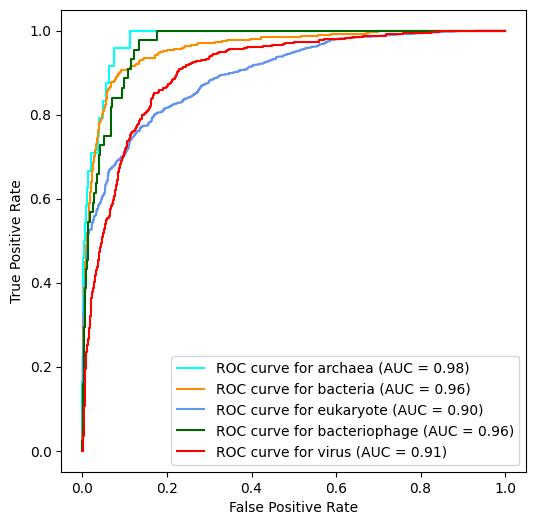

In [16]:
naive_bayes_Kingdom = naive_bayes(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, default_params, cv_params)
naive_bayes_Kingdom.generate('gaussian')

## Neural Networks:

### DNAtype Label:

Epoch 1/15
325/325 [==============================] - 2s 3ms/step - loss: 0.6682 - accuracy: 0.7694 - val_loss: 0.4261 - val_accuracy: 0.8951
Epoch 2/15
325/325 [==============================] - 1s 3ms/step - loss: 0.3196 - accuracy: 0.9121 - val_loss: 0.2446 - val_accuracy: 0.9167
Epoch 3/15
325/325 [==============================] - 1s 3ms/step - loss: 0.2063 - accuracy: 0.9271 - val_loss: 0.1771 - val_accuracy: 0.9468
Epoch 4/15
325/325 [==============================] - 1s 3ms/step - loss: 0.1572 - accuracy: 0.9534 - val_loss: 0.1431 - val_accuracy: 0.9587
Epoch 5/15
325/325 [==============================] - 1s 3ms/step - loss: 0.1287 - accuracy: 0.9621 - val_loss: 0.1199 - val_accuracy: 0.9657
Epoch 6/15
325/325 [==============================] - 1s 3ms/step - loss: 0.1096 - accuracy: 0.9665 - val_loss: 0.1048 - val_accuracy: 0.9688
Epoch 7/15
325/325 [==============================] - 1s 3ms/step - loss: 0.0961 - accuracy: 0.9710 - val_loss: 0.0940 - val_accuracy: 0.9749
Epoch 

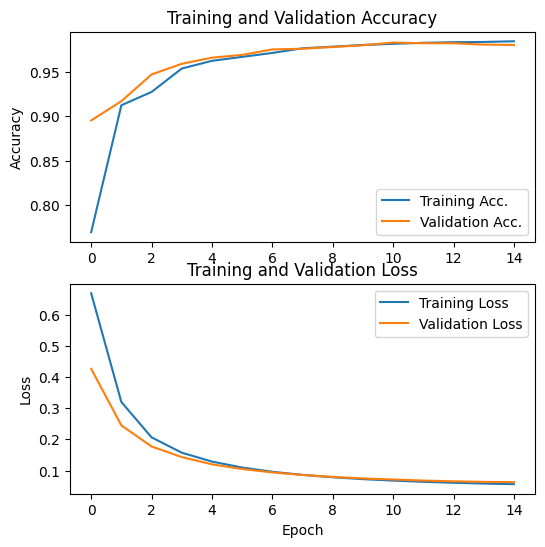

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


from utils.nn import nn
layers=[128, 32]
nn_DNAtype = nn(x_DNAtype_train, y_DNAtype_train, x_DNAtype_test, y_DNAtype_test, layers)
nn_DNAtype.generate()

### Kingdom Label:

Epoch 1/15
325/325 [==============================] - 2s 4ms/step - loss: 1.2590 - accuracy: 0.5117 - val_loss: 1.0533 - val_accuracy: 0.5318
Epoch 2/15
325/325 [==============================] - 1s 4ms/step - loss: 0.9580 - accuracy: 0.5875 - val_loss: 0.8770 - val_accuracy: 0.6317
Epoch 3/15
325/325 [==============================] - 1s 4ms/step - loss: 0.8141 - accuracy: 0.6573 - val_loss: 0.7623 - val_accuracy: 0.6764
Epoch 4/15
325/325 [==============================] - 1s 4ms/step - loss: 0.7175 - accuracy: 0.7141 - val_loss: 0.6833 - val_accuracy: 0.7921
Epoch 5/15
325/325 [==============================] - 1s 4ms/step - loss: 0.6514 - accuracy: 0.7728 - val_loss: 0.6281 - val_accuracy: 0.8022
Epoch 6/15
325/325 [==============================] - 1s 4ms/step - loss: 0.6079 - accuracy: 0.7958 - val_loss: 0.5924 - val_accuracy: 0.7890
Epoch 7/15
325/325 [==============================] - 1s 4ms/step - loss: 0.5774 - accuracy: 0.8036 - val_loss: 0.5642 - val_accuracy: 0.8130
Epoch 

C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\highm\AppData\Roaming\Python\Python39\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


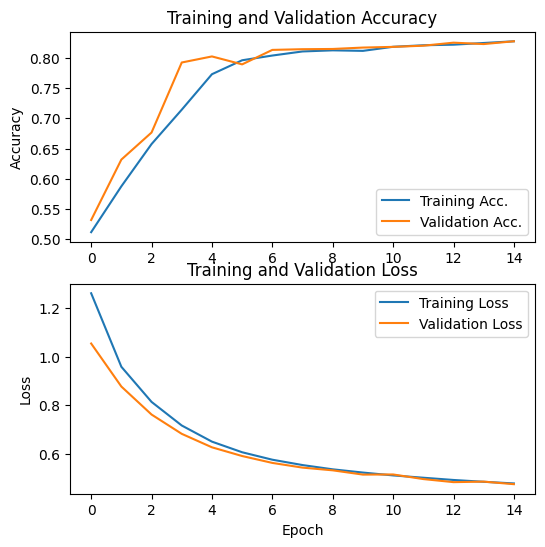

In [18]:
nn_Kingdom = nn(x_Kingdom_train, y_Kingdom_train, x_Kingdom_test, y_Kingdom_test, layers)
nn_Kingdom.generate()